# Word2Vec

In [1]:
text = 'you will never know until you try'

In [2]:
tokens = text.split()

In [3]:
tokens

['you', 'will', 'never', 'know', 'until', 'you', 'try']

In [87]:
# 순서 유지 Unique_Token
from collections import OrderedDict
categories = list(OrderedDict((element, None) for element in tokens))

In [13]:
X = np.array(tokens).reshape(-1,1)

In [132]:
X

array([['you'],
       ['will'],
       ['never'],
       ['know'],
       ['until'],
       ['you'],
       ['try']], dtype='<U5')

In [138]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore') # handle_unknown='ignore'

In [140]:
enc.categories_
word_vec = enc.transform(X).toarray().T
word_vec
data = pd.DataFrame(word_vec, index = enc.categories_)
final_vec = np.matrix(data.T[categories])
final_vec

[array(['know', 'never', 'try', 'until', 'will', 'you'], dtype='<U5')]

matrix([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.]])

In [222]:
# Window 사이즈에 따른 Train Data 생성

# t = window size
def mktraindata(x, t):
    X_data = []
    y_data = []
    for i in range(len(x)):
        for j in range(i-t, i+t+1):
            if j < 0 :
                j = -1
                continue
            if j >= len(x):
                break
            if j != i:
                X_data.append(x[j].getA1())
                y_data.append(x[i].getA1())

    return np.matrix(X_data), np.matrix(y_data)

X_data, y_data = mktraindata(final_vec, 2)

In [228]:
# Hidden Node 수 (차원 수)
H = 4

# Weight (단어벡터)
weight = np.random.random(size = (len(categories), H))

hidden = np.dot(X_data, weight)

In [229]:
weight

array([[0.02211893, 0.42630455, 0.4209864 , 0.61867277],
       [0.54875014, 0.42546305, 0.14392968, 0.58884411],
       [0.07324909, 0.6236108 , 0.17339457, 0.69177113],
       [0.0609407 , 0.6476459 , 0.46624978, 0.6952509 ],
       [0.22956236, 0.95915625, 0.15054935, 0.90198759],
       [0.61908603, 0.0761448 , 0.62405448, 0.30307234]])

In [230]:
hidden

matrix([[0.54875014, 0.42546305, 0.14392968, 0.58884411],
        [0.07324909, 0.6236108 , 0.17339457, 0.69177113],
        [0.02211893, 0.42630455, 0.4209864 , 0.61867277],
        [0.07324909, 0.6236108 , 0.17339457, 0.69177113],
        [0.0609407 , 0.6476459 , 0.46624978, 0.6952509 ],
        [0.02211893, 0.42630455, 0.4209864 , 0.61867277],
        [0.54875014, 0.42546305, 0.14392968, 0.58884411],
        [0.0609407 , 0.6476459 , 0.46624978, 0.6952509 ],
        [0.22956236, 0.95915625, 0.15054935, 0.90198759],
        [0.54875014, 0.42546305, 0.14392968, 0.58884411],
        [0.07324909, 0.6236108 , 0.17339457, 0.69177113],
        [0.22956236, 0.95915625, 0.15054935, 0.90198759],
        [0.02211893, 0.42630455, 0.4209864 , 0.61867277],
        [0.07324909, 0.6236108 , 0.17339457, 0.69177113],
        [0.0609407 , 0.6476459 , 0.46624978, 0.6952509 ],
        [0.02211893, 0.42630455, 0.4209864 , 0.61867277],
        [0.61908603, 0.0761448 , 0.62405448, 0.30307234],
        [0.060

In [231]:
h_weight = np.random.random(size = (H, len(categories)))

In [232]:
h_weight

array([[0.06612453, 0.8997787 , 0.08803106, 0.82032854, 0.46234574,
        0.04382569],
       [0.01938367, 0.68271673, 0.22233605, 0.39805634, 0.45472812,
        0.4567216 ],
       [0.28349581, 0.23045068, 0.93611008, 0.31076321, 0.48861083,
        0.35222468],
       [0.60177987, 0.52063727, 0.98086305, 0.02832953, 0.52906135,
        0.64855825]])

In [233]:
output = np.dot(hidden, h_weight)

In [234]:
output

matrix([[0.43969087, 1.12396731, 0.85521228, 0.6809234 , 0.82904256,
         0.6509628 ],
        [0.48238199, 0.89177822, 0.9859485 , 0.38180275, 0.7681516 ,
         0.79775443],
        [0.50137865, 0.73006809, 1.09765289, 0.33619181, 0.73709362,
         0.745199  ],
        [0.48238199, 0.89177822, 0.9859485 , 0.38180275, 0.7681516 ,
         0.79775443],
        [0.56715128, 0.96641294, 1.26776674, 0.47238036, 0.91832354,
         0.91360002],
        [0.50137865, 0.73006809, 1.09765289, 0.33619181, 0.73709362,
         0.745199  ],
        [0.43969087, 1.12396731, 0.85521228, 0.6809234 , 0.82904256,
         0.6509628 ],
        [0.56715128, 0.96641294, 1.26776674, 0.47238036, 0.91832354,
         0.91360002],
        [0.61924975, 1.36568989, 1.25912069, 0.64245287, 1.09305931,
         1.08614679],
        [0.43969087, 1.12396731, 0.85521228, 0.6809234 , 0.82904256,
         0.6509628 ],
        [0.48238199, 0.89177822, 0.9859485 , 0.38180275, 0.7681516 ,
         0.79775443],

In [235]:
def softmax(a) :
    return np.exp(a) / np.sum(np.exp(a))

In [253]:
result = np.matrix(list(map(softmax, output[:,].getA())))

In [255]:
result

matrix([[0.11790247, 0.23372243, 0.17864118, 0.15006827, 0.17402683,
         0.14563882],
        [0.12875996, 0.1939007 , 0.21304777, 0.11643937, 0.17135193,
         0.17650026],
        [0.13401308, 0.16844796, 0.24327966, 0.11360762, 0.16963556,
         0.17101611],
        [0.12875996, 0.1939007 , 0.21304777, 0.11643937, 0.17135193,
         0.17650026],
        [0.12121114, 0.18069232, 0.24423955, 0.11025139, 0.17220856,
         0.17139704],
        [0.13401308, 0.16844796, 0.24327966, 0.11360762, 0.16963556,
         0.17101611],
        [0.11790247, 0.23372243, 0.17864118, 0.15006827, 0.17402683,
         0.14563882],
        [0.12121114, 0.18069232, 0.24423955, 0.11025139, 0.17220856,
         0.17139704],
        [0.10833854, 0.22853767, 0.20543545, 0.11088172, 0.17400264,
         0.17280399],
        [0.11790247, 0.23372243, 0.17864118, 0.15006827, 0.17402683,
         0.14563882],
        [0.12875996, 0.1939007 , 0.21304777, 0.11643937, 0.17135193,
         0.17650026],

In [264]:
y_data.shape

(22, 6)

In [266]:
result.shape

(22, 6)

In [273]:
loss = -np.multiply(y_data, np.log(result)).sum()

In [274]:
loss

40.88144967391233

In [291]:
temp = (result-y_data).dot(h_weight.T)
w_grad = X_data.T.dot(temp)
h_grad = hidden.T.dot(result-y_data)

In [288]:
# weight 업데이트

r = 0.03
weight -= r*w_grad
h_weight -= r*h_grad

array([[0.02211893, 0.42630455, 0.4209864 , 0.61867277],
       [0.54875014, 0.42546305, 0.14392968, 0.58884411],
       [0.07324909, 0.6236108 , 0.17339457, 0.69177113],
       [0.0609407 , 0.6476459 , 0.46624978, 0.6952509 ],
       [0.22956236, 0.95915625, 0.15054935, 0.90198759],
       [0.61908603, 0.0761448 , 0.62405448, 0.30307234]])

In [ ]:
from collections import OrderedDict
categories = list(OrderedDict((element, None) for element in tokens))

In [292]:

weight = np.random.random(size = (len(categories), H))
h_weight = np.random.random(size = (H, len(categories)))

epocks = 10000
r = 0.03

loss_history = []
for epock in range(epocks):
    hidden = np.dot(X_data, weight)
    output = np.dot(hidden, h_weight)
    result = np.matrix(list(map(softmax, output[:,].getA())))

    loss_history.append(-np.multiply(y_data, np.log(result)).sum())

    temp = (result-y_data).dot(h_weight.T)
    w_grad = X_data.T.dot(temp)
    h_grad = hidden.T.dot(result-y_data)

    # weight 업데이트
    weight -= r*w_grad
    h_weight -= r*h_grad

weight

array([[-0.9779249 ,  1.09915553,  0.09763811, -1.60907048],
       [-0.20796545,  1.76795426, -0.59837205,  3.35542916],
       [ 2.8213533 ,  1.14509549, -0.28644311, -0.05722058],
       [ 0.36728865,  0.78118192,  2.8604919 ,  0.8242549 ],
       [-1.11893775, -0.38788495, -1.54111862,  2.1425576 ],
       [ 2.44245287, -2.44017639,  2.07296036,  0.33897258]])

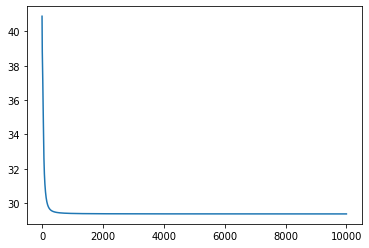

In [293]:
import matplotlib.pyplot as plt 

plt.plot(loss_history)

In [2]:
text = 'you will never know until you try'

In [128]:
vectors

,0,1,2,3
know,2.418918,-3.324329,1.050579,9.610252
never,2.474781,-2.110297,2.785141,2.310004
try,6.735351,-2.399146,-2.483451,-5.587678
until,-17.764967,-0.434003,0.032137,1.705531
will,0.013303,0.156578,0.250370,0.397478
you,14.511025,7.695645,6.542856,-5.225214


In [130]:
cos_sim(vectors.loc['never'], vectors.loc['try'])

0.04166477318618369

In [129]:
cos_sim(vectors.loc['you'], vectors.loc['will'])

0.10503655323134331

In [33]:
# t = window size
def mktraindata(x, t):
    X_data = []
    y_data = []
    for i in range(len(x)):
        temp = []
        for j in range(i-t, i+t+1):
            if j < 0 :
                j = -1
                continue
            if j >= len(x):
                break
            if j != i:
                temp.append(x[j].getA1())
        X_data.append(sum(temp))
        y_data.append(x[i].getA1())

    return np.matrix(X_data), np.matrix(y_data)

def softmax(a):
    return np.exp(a) / np.sum(np.exp(a))

# Input 원래 데이터프레임 칼럼 값들
# Input 데이터프레임.loc[index word]
def cos_sim(vec1, vec2):
    a = np.sqrt((np.array(vec1)**2).sum())
    b = np.sqrt((np.array(vec2)**2).sum())
    return float(np.matrix(vec1).dot(np.matrix(vec2).T)/(a * b))

In [118]:
from collections import OrderedDict
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# t = window size


# X_data, y_data = mktraindata(final_vec, 2)

class Word2Vec():
    def __init__(self, H = 4, r = 0.03, t = 2):
        self.H = H
        self.r = r
        self.t = t
        return

    def mkdatas(self, data):
        tokens = data.split()
        categories = list(OrderedDict((element, None) for element in tokens))
        X = np.array(tokens).reshape(-1,1)
        enc = OneHotEncoder(handle_unknown='ignore') # handle_unknown='ignore'
        word_vec = enc.fit_transform(X).toarray().T
        df = pd.DataFrame(word_vec, index = enc.categories_)
        final_vec = np.matrix(df.T[categories])
        self.categories = categories
        X_data, y_data = mktraindata(final_vec, self.t)
        return X_data, y_data

    def fit(self, X_data, y_data):
        # Hidden Node 수 (차원 수), Learning Rate
        H, r = self.H, self.r

        # Weight (단어벡터)
        weight = np.random.random(size = (len(self.categories), H))
        hidden = np.dot((X_data/np.sum(X_data, axis=1)), weight)

        # h_weight
        h_weight = np.random.random(size = (H, len(self.categories)))

        output = np.dot(hidden, h_weight)
        result = np.matrix(list(map(softmax, output[:,].getA())))
        
        loss_history = []
        loss_history.append(-np.multiply(y_data, np.log(result)).sum())

        epocks = 10000
        for epock in range(epocks):
            temp = (result-y_data).dot(h_weight.T)
            w_grad = X_data.T.dot(temp)
            h_grad = hidden.T.dot(result-y_data)

            # weight 업데이트
            weight -= r*w_grad
            h_weight -= r*h_grad
            
            hidden = np.dot((X_data/sum(X_data)), weight)
            output = np.dot(hidden, h_weight)
            result = np.matrix(list(map(softmax, output[:,].getA())))

            loss_history.append(-np.multiply(y_data, np.log(result)).sum())

        self.loss_history = loss_history
        self.df = pd.DataFrame(weight, index = self.categories)
        return self.df

    def loss_graph(self):
        plt.plot(self.loss_history)
        plt.title('Loss')
        plt.show()


    def word_sim(self):
        res = []
        for c1 in self.categories:
            for c2 in self.categories:
                res.append(cos_sim(self.df.loc[c1], self.df.loc[c2]))

        return pd.DataFrame(np.asarray(res).reshape(len(self.categories), len(self.categories)), index = self.categories, columns = self.categories)


In [119]:
w2v = Word2Vec()

In [120]:
X_data, y_data = w2v.mkdatas(text)

In [121]:
X_data

matrix([[0., 1., 1., 0., 0., 0.],
        [1., 0., 1., 1., 0., 0.],
        [1., 1., 0., 1., 1., 0.],
        [1., 1., 1., 0., 1., 0.],
        [1., 0., 1., 1., 0., 1.],
        [0., 0., 0., 1., 1., 1.],
        [1., 0., 0., 0., 1., 0.]])

In [122]:
y_data

matrix([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.]])

In [123]:
w2v.fit(X_data, y_data)

,0,1,2,3
you,-2.667002,-7.621882,-7.079957,-0.266655
will,1.208747,3.285929,5.923013,-2.294629
never,6.349671,-2.686416,1.947673,2.550951
know,-5.073395,0.239509,4.479902,3.714043
until,-1.761306,-0.666181,-0.024221,-6.868805
try,4.026246,4.294822,-0.212982,2.422130


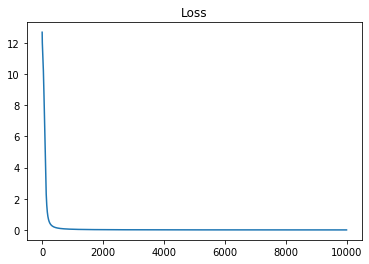

In [124]:
w2v.loss_graph()

In [125]:
w2v.word_sim()

,you,will,never,know,until,try
you,1.000000,-0.893164,-0.133771,-0.253118,0.153938,-0.622754
will,-0.893164,1.000000,0.082133,0.226102,0.218745,0.263219
never,-0.133771,0.082133,1.000000,-0.249537,-0.497798,0.408591
know,-0.253118,0.226102,-0.249537,1.000000,-0.306171,-0.230835
until,0.153938,0.218745,-0.497798,-0.306171,1.000000,-0.586026
try,-0.622754,0.263219,0.408591,-0.230835,-0.586026,1.000000


In [68]:
cos_sim(w2v.df.loc['you'], w2v.df.loc['will'])

-0.8146023415070627

In [30]:
cos_sim(w2v.df.loc['never'], w2v.df.loc['try'])

0.36650149293977824

## 대량 Corpus 처리

In [1]:
def search(dirname):
    filenames = os.listdir(dirname)
    fl = []
    for filename in filenames:
        fl.append(os.path.join(dirname, filename))
    
    return fl

In [2]:
# pip install -U nltk

# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [3]:
folders = search(r'C:\Users\student\Downloads\text')

files=[]
for f in folders:
    files.extend(search(f))

In [5]:
len(files)

13864

In [4]:
# Batch Size만큼 뽑아서 사용
batch_size = 100
batch = 0
datas = []
for i, fi in enumerate(files):
    if i == batch_size:
        break
    with open(fi, 'rb') as f:
        datas.append(f.readlines())


In [6]:
len(datas)

100

In [7]:
import re

In [8]:
mass_token = []

In [9]:
for data in datas:
    for d in data:
        temps = re.finditer('[a-z][^ ]*[a-z]', d.decode())
        for temp in temps:
            mass_token.append(temp.group())

In [110]:
# mass_token[-50:]

In [10]:
len(mass_token)

15203656

In [11]:
def is_stopword(n):
    return True if n not in stop_words else False

mass_token = list(filter(is_stopword, mass_token))

In [12]:
len(mass_token)

9113725

In [14]:
unique_token = list(set(mass_token))

In [15]:
len(unique_token)

308815

In [17]:
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
l.fit(unique_token)

LabelEncoder()

In [19]:
l.transform(unique_token)

array([226791,   3733,  77472, ..., 148879, 213888,  17485], dtype=int64)

In [23]:
l.classes_[1]

'a""b'

In [12]:
class Word2Vec():
    def __init__(self, H = 4, r = 0.03, t = 2):
        self.H = H
        self.r = r
        self.t = t
        return

    def mkdatas(self, data):
        tokens = data.split()
        categories = list(OrderedDict((element, None) for element in tokens))
        X = np.array(tokens).reshape(-1,1)
        enc = OneHotEncoder(handle_unknown='ignore') # handle_unknown='ignore'
        word_vec = enc.fit_transform(X).toarray().T
        df = pd.DataFrame(word_vec, index = enc.categories_)
        final_vec = np.matrix(df.T[categories])
        self.categories = categories
        X_data, y_data = mktraindata(final_vec, self.t)
        return X_data, y_data

    def fit(self, X_data, y_data):
        # Hidden Node 수 (차원 수), Learning Rate
        H, r = self.H, self.r

        # Weight (단어벡터)
        weight = np.random.random(size = (len(self.categories), H))
        hidden = np.dot(X_data, weight)

        # h_weight
        h_weight = np.random.random(size = (H, len(self.categories)))

        output = np.dot(hidden, h_weight)
        result = np.matrix(list(map(softmax, output[:,].getA())))
        
        loss_history = []
        loss_history.append(-np.multiply(y_data, np.log(result)).sum())

        epocks = 10000
        for epock in range(epocks):
            temp = (result-y_data).dot(h_weight.T)
            w_grad = X_data.T.dot(temp)
            h_grad = hidden.T.dot(result-y_data)

            # weight 업데이트
            weight -= r*w_grad
            h_weight -= r*h_grad
            
            hidden = np.dot(X_data, weight)
            output = np.dot(hidden, h_weight)
            result = np.matrix(list(map(softmax, output[:,].getA())))

            loss_history.append(-np.multiply(y_data, np.log(result)).sum())

        self.loss_history = loss_history
        self.df = pd.DataFrame(weight, index = self.categories)
        return self.df

    def loss_graph(self):
        plt.plot(self.loss_history)
        plt.title('Loss')
        plt.show()


    def word_sim(self):
        res = []
        for c1 in self.categories:
            for c2 in self.categories:
                res.append(cos_sim(self.df.loc[c1], self.df.loc[c2]))

        return pd.DataFrame(np.asarray(res).reshape(len(self.categories), len(self.categories)), index = self.categories, columns = self.categories)


In [108]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import nltk
import string
from tqdm import tqdm 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class CBoW:
    def __init__(self, doc, N_dim, N_window, alpha, epoch):
        self.doc = doc
        self.N_dim = N_dim
        self.N_window = N_window
        self.alpha = alpha
        self.epoch = epoch

    def _tokenize(self):
        pos_unused = ['CC', 'DT']
        stopwords = list(string.punctuation)
        words = pos_tag(word_tokenize(self.doc))
        words = [w[0] for w in words if w[1] not in pos_unused and w[0] not in stopwords]
        token = np.unique(words)
        self.token = token
        self.words = words
        return words, token

    def _init_weight(self):
        W1 = np.random.random_sample((len(self.token), self.N_dim))
        W2 = np.random.random_sample((self.N_dim, len(self.token)))
        return W1, W2

    def _onehot_encoding(self):
        one_hot = {}
        for i, word in enumerate(self.token):
            one_hot[word] = np.eye(len(self.token))[i]
        return one_hot
    
    def _softmax(self, v):
        return np.exp(v) / sum(np.exp(v))

    def optimize(self):
        words, token = self._tokenize()
        one_hot = self._onehot_encoding()
        W1, W2 = self._init_weight()
        losses_epoch = []

        for e in tqdm(range(self.epoch)):
            losses = []
            for i, word in enumerate(words):
                output_vec = one_hot[word]
                input_vec = []

                for j in range(1, self.N_window+1):
                    if i-j >= 0:
                        input_vec.append(one_hot[words[i-j]]) # 전 단어
                    try: input_vec.append(one_hot[words[i+j]]) # 후 단어
                    except: pass
                
                H = []
                for j in range(len(input_vec)):
                    H.append(np.dot(input_vec[j], W1))
                H = np.sum(H, axis=0) / len(input_vec) # 모든 window 속 단어들의 평균값

                pred = self._softmax(np.dot(H, W2))

                loss = -np.dot(output_vec, np.log(pred).reshape(len(pred), 1))
                losses.extend(loss)
                
                gradient_W2 = np.dot(H.reshape(len(H), 1), (pred-output_vec).reshape(1, len(pred)))
                gradient_W1 = np.dot(input_vec[j].reshape(len(input_vec[j]), 1), np.dot(W2, (pred-output_vec)).reshape(1, len(W2)))
                
                W2 -= self.alpha * gradient_W2
                W1 -= self.alpha * gradient_W1
            
            losses_epoch.append(np.sum(losses))
        
        self.W1 = W1
        self.W2 = W2
        self.losses_epoch = losses_epoch

        print(W1)

    def plot(self):    
        plt.plot(np.arange(self.epoch), self.losses_epoch)
        plt.title("Loss of CBoW", size=15)
        plt.xlabel("epoch")
        plt.ylabel("Loss")
        plt.show()
    
    def similarity(self):
        return pd.DataFrame(self.W1, index = self.token)
    
    def similar_tokens(self, N_similar):
        similarity_minus = {}
        similarity_df = {}

        for i in range(len(self.token)):
            tmp = []
            for j in range(len(self.token)):
                similarity = np.dot(self.W1[i], self.W1[j]) / np.linalg.norm(self.W1[i]) * np.linalg.norm(self.W1[j])
                tmp.append(-similarity) # 순서 정렬을 위해 음수 처리
            similarity_minus[self.token[i]] = tmp

        for i, t in enumerate(self.token, N_similar):
            tmp = np.argsort(similarity_minus[t]) # 순서대로 유사도가 높은 것
            similarity_df[t] = self.token[np.delete(tmp, np.where(tmp == i))][:N_similar] # 같은 단어 출력 방지
        print(pd.DataFrame(similarity_df))
        return pd.DataFrame(similarity_df)

    def accuracy(self):
        acc = 0
        for i in range(len(self.words)-3):
            word_1 = np.where(self.token == self.words[i])
            word_2 = np.where(self.token == self.words[i+1])
            word_3 = np.where(self.token == self.words[i+2])
            w = self.W1[word_1] - self.W1[word_2] + self.W1[word_3]

            simmilar_w = []
            for j in range(len(self.token)):
                tmp = np.dot(w, self.W1[j]) / np.linalg.norm(w) * np.linalg.norm(self.W1[j])
                simmilar_w.append(tmp)
            acc += (self.token[np.argmax(simmilar_w)] == self.words[i+3]) * 1

        acc = acc / (len(self.words)-3)
        return acc


if __name__ == "__main__":
    doc = "you will never know until you try."
    nltk.download('averaged_perceptron_tagger')
    cb = CBoW(doc, 4, 2, 0.01, 10000)
    
    cb.optimize()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\student\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
100%|██████████| 10000/10000 [00:03<00:00, 2595.51it/s][[ 2.41891809e+00 -3.32432869e+00  1.05057869e+00  9.61025231e+00]
 [ 2.47478075e+00 -2.11029669e+00  2.78514103e+00  2.31000418e+00]
 [ 6.73535086e+00 -2.39914591e+00 -2.48345069e+00 -5.58767786e+00]
 [-1.77649668e+01 -4.34003268e-01  3.21365106e-02  1.70553096e+00]
 [ 1.33027524e-02  1.56578370e-01  2.50370482e-01  3.97477585e-01]
 [ 1.45110248e+01  7.69564460e+00  6.54285627e+00 -5.22521418e+00]]



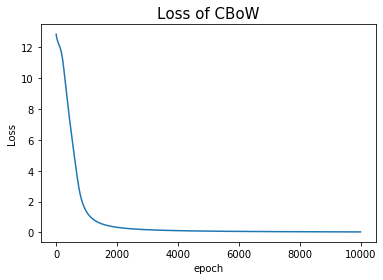

In [109]:
cb.plot()


In [127]:
vectors = cb.similarity()

In [112]:
cb.similar_tokens(3)


know  never    try  until   will    you
0   know    you    try  until   know    you
1  never   know  never   will    you    try
2   will  never   will  never  until  never


,know,never,try,until,will,you
0,know,you,try,until,know,you
1,never,know,never,will,you,try
2,will,never,will,never,until,never


In [113]:
cb.accuracy()

0.0

In [153]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(text)
model.init_sims(replace=True)

In [158]:
model.train(text.split(), total_examples=1, epochs=10000)

(0, 270000)

In [165]:
model.wv.vocab

{' ': <gensim.models.keyedvectors.Vocab at 0x238337aca48>}

In [157]:
model.wv['you']

KeyError: "word 'you' not in vocabulary"

In [147]:
model.vocabulary

In [145]:
model.wv.similarity('you', 'will')

KeyError: "word 'you' not in vocabulary"